# Capstone Project - The Battle of Neighborhoods

## New store location in Barcelona

<img  src=http://3.bp.blogspot.com/-EsiXnXwH4K8/VSadZk-fiqI/AAAAAAAAE48/z0ch8qF_G1Y/s1600/01%2BHuerto%2Bde%2Bla%2BSagrada%2BFamilia%2BBarcelona.jpg>

## Description of the Problem and a discussion of the background

A provider of agricultural articles and supplies in Spain wants to expand its business line in response to the growing market of urban agriculture in small spaces, which has a special boom in the city of Barcelona, due to the concern for the organic food.

The commercial strategy is to place an own store in a  neighborhoods with an urban farm. It’s important  to be able to expand the business by attracting the attention  of new independent distributors who wish to represent the brand in other cities in Spain and the rest of the European community. For this reason, the neighborhood that has a wide range of ‘Spanish Restaurants’, ‘Hotels’ and ‘Coffee Shops’,  will be prioritized in order to attend business partners from other cities.

## A description of the data and how it will be used to solve the problem

It will be used the data about the location of urban farms in Barcelona from  https://opendata-ajuntament.barcelona.cat/data/es/dataset/horts-urbans.

After cleaning and ordering the data,  the available data on Foursquare will be crossed in order to identify which neigborhoods with an urban farm have a greater offer of ‘Spanish Restaurants’, ‘Hotels’ and ‘Coffee Shops’, which will allow optimizing the decision of where to open a local distributor without spending time  and money visiting the neighborhoods or hiring a real state broker.

In [1]:
# Import libraries
import numpy as np
import json
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
# Download the dataset and read it into a pandas dataframe.
# The dataset was downloaded from Open Data Barcelona (BCN) https://opendata-ajuntament.barcelona.cat/en
# Then placed on the GitHub repo for the project.
barcelona = pd.read_csv('https://raw.githubusercontent.com/Javier242/Coursera_Capstone/master/HORTS_URBANS.csv')
barcelona

,CODI_CAPA,CAPA_GENERICA,NOM_CAPA,ED50_COORD_X,ED50_COORD_Y,ETRS89_COORD_X,ETRS89_COORD_Y,LONGITUD,LATITUD,DISTRICTE,BARRI,NOM_DISTRICTE,NOM_BARRI,EQUIPAMENT,ADRECA,TELEFON
0,M009,Medi ambient,Horts urbans,428590.952,4579243.454,428499.036,4579042.548,2.145165,41.359715,3,13,Sants-Montjuïc,la Marina de Port,Hort Urbà Masia Can Mestres,"Camí Can Clos, 1*9",10.0
1,M009,Medi ambient,Horts urbans,432907.109,4589145.239,432815.157,4588944.240,2.195663,41.449268,9,60,Sant Andreu,Sant Andreu,Hort Urbà Parc de la Trinitat,"Pg Santa Coloma, 60",10.0
2,M009,Medi ambient,Horts urbans,427454.616,4586506.529,427362.713,4586305.556,2.130710,41.425028,7,39,Horta-Guinardó,Sant Genís dels Agudells,Hort Urbà Masia Can Soler,"Ctra Sant Cugat, 114*132",10.0
3,M009,Medi ambient,Horts urbans,428121.665,4582340.323,428029.755,4582139.388,2.139188,41.387565,4,19,Les Corts,les Corts,Associació Hort Urbà Espai Colònia Castells - ...,"C Montnegre, 30",NaN
4,M009,Medi ambient,Horts urbans,425821.501,4583114.795,425729.612,4582913.854,2.111585,41.394331,4,21,Les Corts,Pedralbes,Hort Urbà de Pedralbes,"C Castellet, 2",10.0
5,M009,Medi ambient,Horts urbans,433173.050,4589193.170,433081.095,4588992.170,2.198841,41.449722,9,57,Sant Andreu,la Trinitat Vella,Hort Urbà Baró de Viver,"Pg Santa Coloma, 125",10.0
6,M009,Medi ambient,Horts urbans,431603.892,4583984.370,431511.950,4583783.419,2.180647,41.402677,2,6,Eixample,la Sagrada Família,Hort Urbà Sagrada Família,"C Padilla, 199*201",10.0
7,M009,Medi ambient,Horts urbans,433089.246,4585983.306,432997.291,4585782.336,2.198194,41.420805,10,72,Sant Martí,Sant Martí de Provençals,Centre Experimental i Educatiu Agricultura Bio...,"C Menorca, 27",10.0
8,M009,Medi ambient,Horts urbans,427371.748,4581254.418,427279.844,4581053.494,2.130350,41.377718,3,18,Sants-Montjuïc,Sants,Hort Urbà d'en Queni,"C Rosés, 8",NaN
9,M009,Medi ambient,Horts urbans,432274.631,4589561.580,432182.685,4589360.577,2.188045,41.452965,8,53,Nou Barris,la Trinitat Nova,La Casa de l'Aigua-Hort Urbà,"C Garbí, 2*4",10.0


In [3]:
# Rename the necessary columns
barcelona.rename(columns={'NOM_BARRI': 'Neighborhood', 'LONGITUD': 'Longitude', 'LATITUD': 'Latitude', 'NOM_DISTRICTE': 'District'}, inplace=True)
barcelona

,CODI_CAPA,CAPA_GENERICA,NOM_CAPA,ED50_COORD_X,ED50_COORD_Y,ETRS89_COORD_X,ETRS89_COORD_Y,Longitude,Latitude,DISTRICTE,BARRI,District,Neighborhood,EQUIPAMENT,ADRECA,TELEFON
0,M009,Medi ambient,Horts urbans,428590.952,4579243.454,428499.036,4579042.548,2.145165,41.359715,3,13,Sants-Montjuïc,la Marina de Port,Hort Urbà Masia Can Mestres,"Camí Can Clos, 1*9",10.0
1,M009,Medi ambient,Horts urbans,432907.109,4589145.239,432815.157,4588944.240,2.195663,41.449268,9,60,Sant Andreu,Sant Andreu,Hort Urbà Parc de la Trinitat,"Pg Santa Coloma, 60",10.0
2,M009,Medi ambient,Horts urbans,427454.616,4586506.529,427362.713,4586305.556,2.130710,41.425028,7,39,Horta-Guinardó,Sant Genís dels Agudells,Hort Urbà Masia Can Soler,"Ctra Sant Cugat, 114*132",10.0
3,M009,Medi ambient,Horts urbans,428121.665,4582340.323,428029.755,4582139.388,2.139188,41.387565,4,19,Les Corts,les Corts,Associació Hort Urbà Espai Colònia Castells - ...,"C Montnegre, 30",NaN
4,M009,Medi ambient,Horts urbans,425821.501,4583114.795,425729.612,4582913.854,2.111585,41.394331,4,21,Les Corts,Pedralbes,Hort Urbà de Pedralbes,"C Castellet, 2",10.0
5,M009,Medi ambient,Horts urbans,433173.050,4589193.170,433081.095,4588992.170,2.198841,41.449722,9,57,Sant Andreu,la Trinitat Vella,Hort Urbà Baró de Viver,"Pg Santa Coloma, 125",10.0
6,M009,Medi ambient,Horts urbans,431603.892,4583984.370,431511.950,4583783.419,2.180647,41.402677,2,6,Eixample,la Sagrada Família,Hort Urbà Sagrada Família,"C Padilla, 199*201",10.0
7,M009,Medi ambient,Horts urbans,433089.246,4585983.306,432997.291,4585782.336,2.198194,41.420805,10,72,Sant Martí,Sant Martí de Provençals,Centre Experimental i Educatiu Agricultura Bio...,"C Menorca, 27",10.0
8,M009,Medi ambient,Horts urbans,427371.748,4581254.418,427279.844,4581053.494,2.130350,41.377718,3,18,Sants-Montjuïc,Sants,Hort Urbà d'en Queni,"C Rosés, 8",NaN
9,M009,Medi ambient,Horts urbans,432274.631,4589561.580,432182.685,4589360.577,2.188045,41.452965,8,53,Nou Barris,la Trinitat Nova,La Casa de l'Aigua-Hort Urbà,"C Garbí, 2*4",10.0


In [4]:
# Clean up the data removing unnecessary columns.
barcelona.drop(['CODI_CAPA', 'CAPA_GENERICA', 'NOM_CAPA', 'ED50_COORD_X', 'ED50_COORD_Y', 'ETRS89_COORD_X', 'ETRS89_COORD_Y', 'DISTRICTE', 'BARRI', 'EQUIPAMENT', 'ADRECA', 'TELEFON' ], axis=1, inplace=True)
barcelona

,Longitude,Latitude,District,Neighborhood
0,2.145165,41.359715,Sants-Montjuïc,la Marina de Port
1,2.195663,41.449268,Sant Andreu,Sant Andreu
2,2.130710,41.425028,Horta-Guinardó,Sant Genís dels Agudells
3,2.139188,41.387565,Les Corts,les Corts
4,2.111585,41.394331,Les Corts,Pedralbes
5,2.198841,41.449722,Sant Andreu,la Trinitat Vella
6,2.180647,41.402677,Eixample,la Sagrada Família
7,2.198194,41.420805,Sant Martí,Sant Martí de Provençals
8,2.130350,41.377718,Sants-Montjuïc,Sants
9,2.188045,41.452965,Nou Barris,la Trinitat Nova


## Methodology and Exploratory Data Analysis¶

#### The Data Science Workflow for parts 3 & 4 includes:

#### Data Analysis and Location Data:

- Foursquare location data will be leveraged to explore or compare districts around Barcelona.

- Data manipulation and analysis to derive subsets of the initial data.

- Identifying the high traffic areas using data visualisation and tatistical nalysis.

#### Visualization:

- Analysis and plotting visualizations.

- Data visualization using various mapping libraries.

#### Discussion and Conclusions:

- Recomendations and results based on the data analysis.

- Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.

In [5]:
barcelona.shape

(19, 4)

### Use the geopy library to get the latitude and longitude values of Barcelona

In [7]:
from geopy.geocoders import Nominatim 

address = 'Barcelona'

geolocator = Nominatim(user_agent="Barcelona_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Barcelona España are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Barcelona España are 41.3828939, 2.1774322.


### Create a map of Barcelona with districts superimposed

In [8]:
map_barcelona = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(barcelona['Latitude'], barcelona['Longitude'], barcelona['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='green',
        fill=True,
        fill_color='#00FF00',
        fill_opacity=0.25,
        parse_html=False).add_to(map_barcelona)  
    
map_barcelona

### Define Foursquare Credentials and Version

In [9]:
CLIENT_ID = '5WEQFTU1WRU3GRXI21VZFYCRG0FJH1CN43L3JZMRFYEEVLBX'
CLIENT_SECRET = 'WQ4NX5OKVPJGAJJEGCYISHQPXK0C3MP205GTYGUFRVZLTZPQ'
VERSION = '20200123'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5WEQFTU1WRU3GRXI21VZFYCRG0FJH1CN43L3JZMRFYEEVLBX
CLIENT_SECRET:WQ4NX5OKVPJGAJJEGCYISHQPXK0C3MP205GTYGUFRVZLTZPQ


### Explore the first district in our dataframe

In [12]:
barcelona.loc[0, 'District']

'Sants-Montjuïc'

In [13]:
neighborhood_latitude = barcelona.loc[0, 'Latitude']
neighborhood_longitude = barcelona.loc[0, 'Longitude']

neighborhood_name = barcelona.loc[0, 'Neighborhood']

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood la Marina de Port are 41.359715, 2.145165.


In [14]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=5WEQFTU1WRU3GRXI21VZFYCRG0FJH1CN43L3JZMRFYEEVLBX&client_secret=WQ4NX5OKVPJGAJJEGCYISHQPXK0C3MP205GTYGUFRVZLTZPQ&v=20200123&ll=41.359715,2.145165&radius=500&limit=100'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e2b29351e152c001f2b75c2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Sants-Montjuïg',
  'headerFullLocation': 'Sants-Montjuïg, Barcelona',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 10,
  'suggestedBounds': {'ne': {'lat': 41.364215004500004,
    'lng': 2.1511492085754567},
   'sw': {'lat': 41.3552149955, 'lng': 2.1391807914245433}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57740541498eb3a7b6e507a2',
       'name': 'Strip Club Barcelona',
       'location': {'address': 'Carrer del Gaia 5',
        'lat': 41.36183658508655,
        'lng': 2.1414488554000854,
        'labeledLatLngs': [{'label': 'display',
      

### Function to extract venue categories

In [16]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

,name,categories,lat,lng
0,Strip Club Barcelona,Transportation Service,41.361837,2.141449
1,Club Natació Montjuïc,Pool,41.362056,2.145095
2,365.café,Café,41.359593,2.142241
3,Bauhaus,Furniture / Home Store,41.357789,2.140538
4,Bascula Espai Musical (La),Concert Hall,41.358973,2.145209
5,Sot del Migdia - Zona de Practicas de Coche y...,Road,41.359474,2.147530
6,Plaça Alta Can Clos,Plaza,41.360948,2.147689
7,Complex Esportiu La Bàscula,Soccer Field,41.358668,2.145334
8,Golf Montjuic,Golf Course,41.362121,2.144303
9,Midas,Automotive Shop,41.356515,2.142731


In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

10 venues were returned by Foursquare.


In [19]:
#Create a nearby venues function for all the neighborhoods with an urban farm in Barcelona
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
barcelona_venues = getNearbyVenues(names=barcelona['Neighborhood'],
                                   latitudes=barcelona['Latitude'],
                                   longitudes=barcelona['Longitude']
                                  )

la Marina de Port
Sant Andreu
Sant Genís dels Agudells
les Corts
Pedralbes
la Trinitat Vella
la Sagrada Família
Sant Martí de Provençals
Sants
la Trinitat Nova
Can Peguera
el Raval
Vallcarca i els Penitents
Vallvidrera, el Tibidabo i les Planes
Sant Gervasi - la Bonanova
Vallcarca i els Penitents
la Sagrera
el Clot
la Bordeta


In [23]:
print(barcelona_venues.shape)
barcelona_venues.head(200)

(511, 7)


,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,la Marina de Port,41.359715,2.145165,Strip Club Barcelona,41.361837,2.141449,Transportation Service
1,la Marina de Port,41.359715,2.145165,Club Natació Montjuïc,41.362056,2.145095,Pool
2,la Marina de Port,41.359715,2.145165,365.café,41.359593,2.142241,Café
3,la Marina de Port,41.359715,2.145165,Bauhaus,41.357789,2.140538,Furniture / Home Store
4,la Marina de Port,41.359715,2.145165,Bascula Espai Musical (La),41.358973,2.145209,Concert Hall
5,la Marina de Port,41.359715,2.145165,Sot del Migdia - Zona de Practicas de Coche y...,41.359474,2.147530,Road
6,la Marina de Port,41.359715,2.145165,Plaça Alta Can Clos,41.360948,2.147689,Plaza
7,la Marina de Port,41.359715,2.145165,Complex Esportiu La Bàscula,41.358668,2.145334,Soccer Field
8,la Marina de Port,41.359715,2.145165,Golf Montjuic,41.362121,2.144303,Golf Course
9,la Marina de Port,41.359715,2.145165,Midas,41.356515,2.142731,Automotive Shop


In [24]:
#Check how many venues were returned for each neighborhood
barcelona_venues.groupby('Neighborhood').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Can Peguera,27,27,27,27,27,27
Pedralbes,12,12,12,12,12,12
Sant Andreu,7,7,7,7,7,7
Sant Genís dels Agudells,4,4,4,4,4,4
Sant Gervasi - la Bonanova,19,19,19,19,19,19
Sant Martí de Provençals,18,18,18,18,18,18
Sants,48,48,48,48,48,48
Vallcarca i els Penitents,47,47,47,47,47,47
"Vallvidrera, el Tibidabo i les Planes",4,4,4,4,4,4


In [25]:
print('There are {} unique venue categories.'.format(len(barcelona_venues['Venue Category'].unique())))

There are 145 unique venue categories.


### Analyze each of the Neighborhoods

In [26]:
barcelona_onehot = pd.get_dummies(barcelona_venues[['Venue Category']], prefix="", prefix_sep="")

barcelona_onehot['Neighborhood'] = barcelona_venues['Neighborhood'] 

fixed_columns = [barcelona_onehot.columns[-1]] + list(barcelona_onehot.columns[:-1])
barcelona_onehot = barcelona_onehot[fixed_columns]

barcelona_onehot

,Neighborhood,Accessories Store,Animal Shelter,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Auto Dealership,...,Theme Park,Toy / Game Store,Track Stadium,Trail,Tram Station,Transportation Service,Wine Bar,Wine Shop,Winery,Yoga Studio
0,la Marina de Port,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,la Marina de Port,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,la Marina de Port,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,la Marina de Port,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,la Marina de Port,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,la Marina de Port,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,la Marina de Port,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,la Marina de Port,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,la Marina de Port,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,la Marina de Port,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
barcelona_onehot.shape

(511, 146)

In [28]:
# Group rows by neighborhood and take the mean of the frecuency of occurrence of each category
barcelona_grouped = barcelona_onehot.groupby('Neighborhood').mean().reset_index()
barcelona_grouped

,Neighborhood,Accessories Store,Animal Shelter,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Auto Dealership,...,Theme Park,Toy / Game Store,Track Stadium,Trail,Tram Station,Transportation Service,Wine Bar,Wine Shop,Winery,Yoga Studio
0,Can Peguera,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.037037,0.000000
1,Pedralbes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,...,0.00,0.000000,0.000000,0.083333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,Sant Andreu,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,Sant Genís dels Agudells,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,...,0.25,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,Sant Gervasi - la Bonanova,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,Sant Martí de Provençals,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.055556,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,Sants,0.000000,0.000000,0.020833,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.020833,0.000000,0.000000,0.000000
7,Vallcarca i els Penitents,0.000000,0.000000,0.000000,0.000000,0.000000,0.085106,0.00,0.00000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.021277,0.000000,0.000000,0.000000
8,"Vallvidrera, el Tibidabo i les Planes",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,el Clot,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.019608,0.000000,0.000000


In [29]:
barcelona_grouped.shape

(18, 146)

### Print each neighborhood with it's top 10 most common venues

In [30]:
num_top_venues = 10

for hood in barcelona_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = barcelona_grouped[barcelona_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Can Peguera----
                venue  freq
0    Tapas Restaurant  0.15
1  Spanish Restaurant  0.07
2                Park  0.07
3        Burger Joint  0.07
4      Sandwich Place  0.07
5         Pizza Place  0.07
6          Restaurant  0.04
7    Pedestrian Plaza  0.04
8         Sports Club  0.04
9   German Restaurant  0.04


----Pedralbes----
                      venue  freq
0  Mediterranean Restaurant  0.17
1                    Garden  0.17
2                    Museum  0.08
3        Spanish Restaurant  0.08
4             Garden Center  0.08
5                     Hotel  0.08
6                     Trail  0.08
7                     Plaza  0.08
8                 Nightclub  0.08
9      Gym / Fitness Center  0.08


----Sant Andreu----
                venue  freq
0       Metro Station  0.29
1        Soccer Field  0.14
2    Tapas Restaurant  0.14
3  Spanish Restaurant  0.14
4               Plaza  0.14
5                Park  0.14
6   Accessories Store  0.00
7    Pedestrian Plaza  0.00
8   

### Put the data into a pandas dataframe and sort the venues in descending order

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Top 10 categories for each neighborhood

In [32]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
barcelona_venues_sorted = pd.DataFrame(columns=columns)
barcelona_venues_sorted['Neighborhood'] = barcelona_grouped['Neighborhood']

for ind in np.arange(barcelona_grouped.shape[0]):
    barcelona_venues_sorted.iloc[ind, 1:] = return_most_common_venues(barcelona_grouped.iloc[ind, :], num_top_venues)

barcelona_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Can Peguera,Tapas Restaurant,Burger Joint,Pizza Place,Spanish Restaurant,Sandwich Place,Park,Hostel,Sports Club,Café,Supermarket
1,Pedralbes,Garden,Mediterranean Restaurant,Plaza,Spanish Restaurant,Museum,Garden Center,Gym / Fitness Center,Nightclub,Trail,Hotel
2,Sant Andreu,Metro Station,Spanish Restaurant,Park,Plaza,Soccer Field,Tapas Restaurant,Yoga Studio,Fast Food Restaurant,Food Truck,Food & Drink Shop
3,Sant Genís dels Agudells,Sports Bar,Tennis Court,Tapas Restaurant,Theme Park,Garden Center,Garden,Furniture / Home Store,Food Truck,Food & Drink Shop,Fast Food Restaurant
4,Sant Gervasi - la Bonanova,Plaza,Bar,Cocktail Bar,Park,Planetarium,Science Museum,Snack Place,Spanish Restaurant,Buffet,Supermarket
5,Sant Martí de Provençals,Bakery,Grocery Store,Supermarket,Tapas Restaurant,Park,Metro Station,Mediterranean Restaurant,Basketball Court,Burger Joint,Soccer Field
6,Sants,Hostel,Tapas Restaurant,Bar,Supermarket,Pizza Place,Café,Restaurant,Bakery,Spanish Restaurant,Gym / Fitness Center
7,Vallcarca i els Penitents,Park,Sandwich Place,Scenic Lookout,Café,Art Museum,Bar,Hotel,Museum,Mountain,Botanical Garden
8,"Vallvidrera, el Tibidabo i les Planes",Restaurant,Convenience Store,Lake,Soccer Field,Farmers Market,Garden Center,Garden,Furniture / Home Store,Food Truck,Food & Drink Shop
9,el Clot,Spanish Restaurant,Tapas Restaurant,Bakery,Restaurant,Supermarket,Park,Coffee Shop,Cocktail Bar,Café,Dessert Shop


In [33]:
barcelona_venues_sorted.shape

(18, 11)

### Business types criteria: 'Spanish Restaurants', 'Hotels' and 'Coffee Shops'

### Finding frecuency of the criteria en the neighborhoods

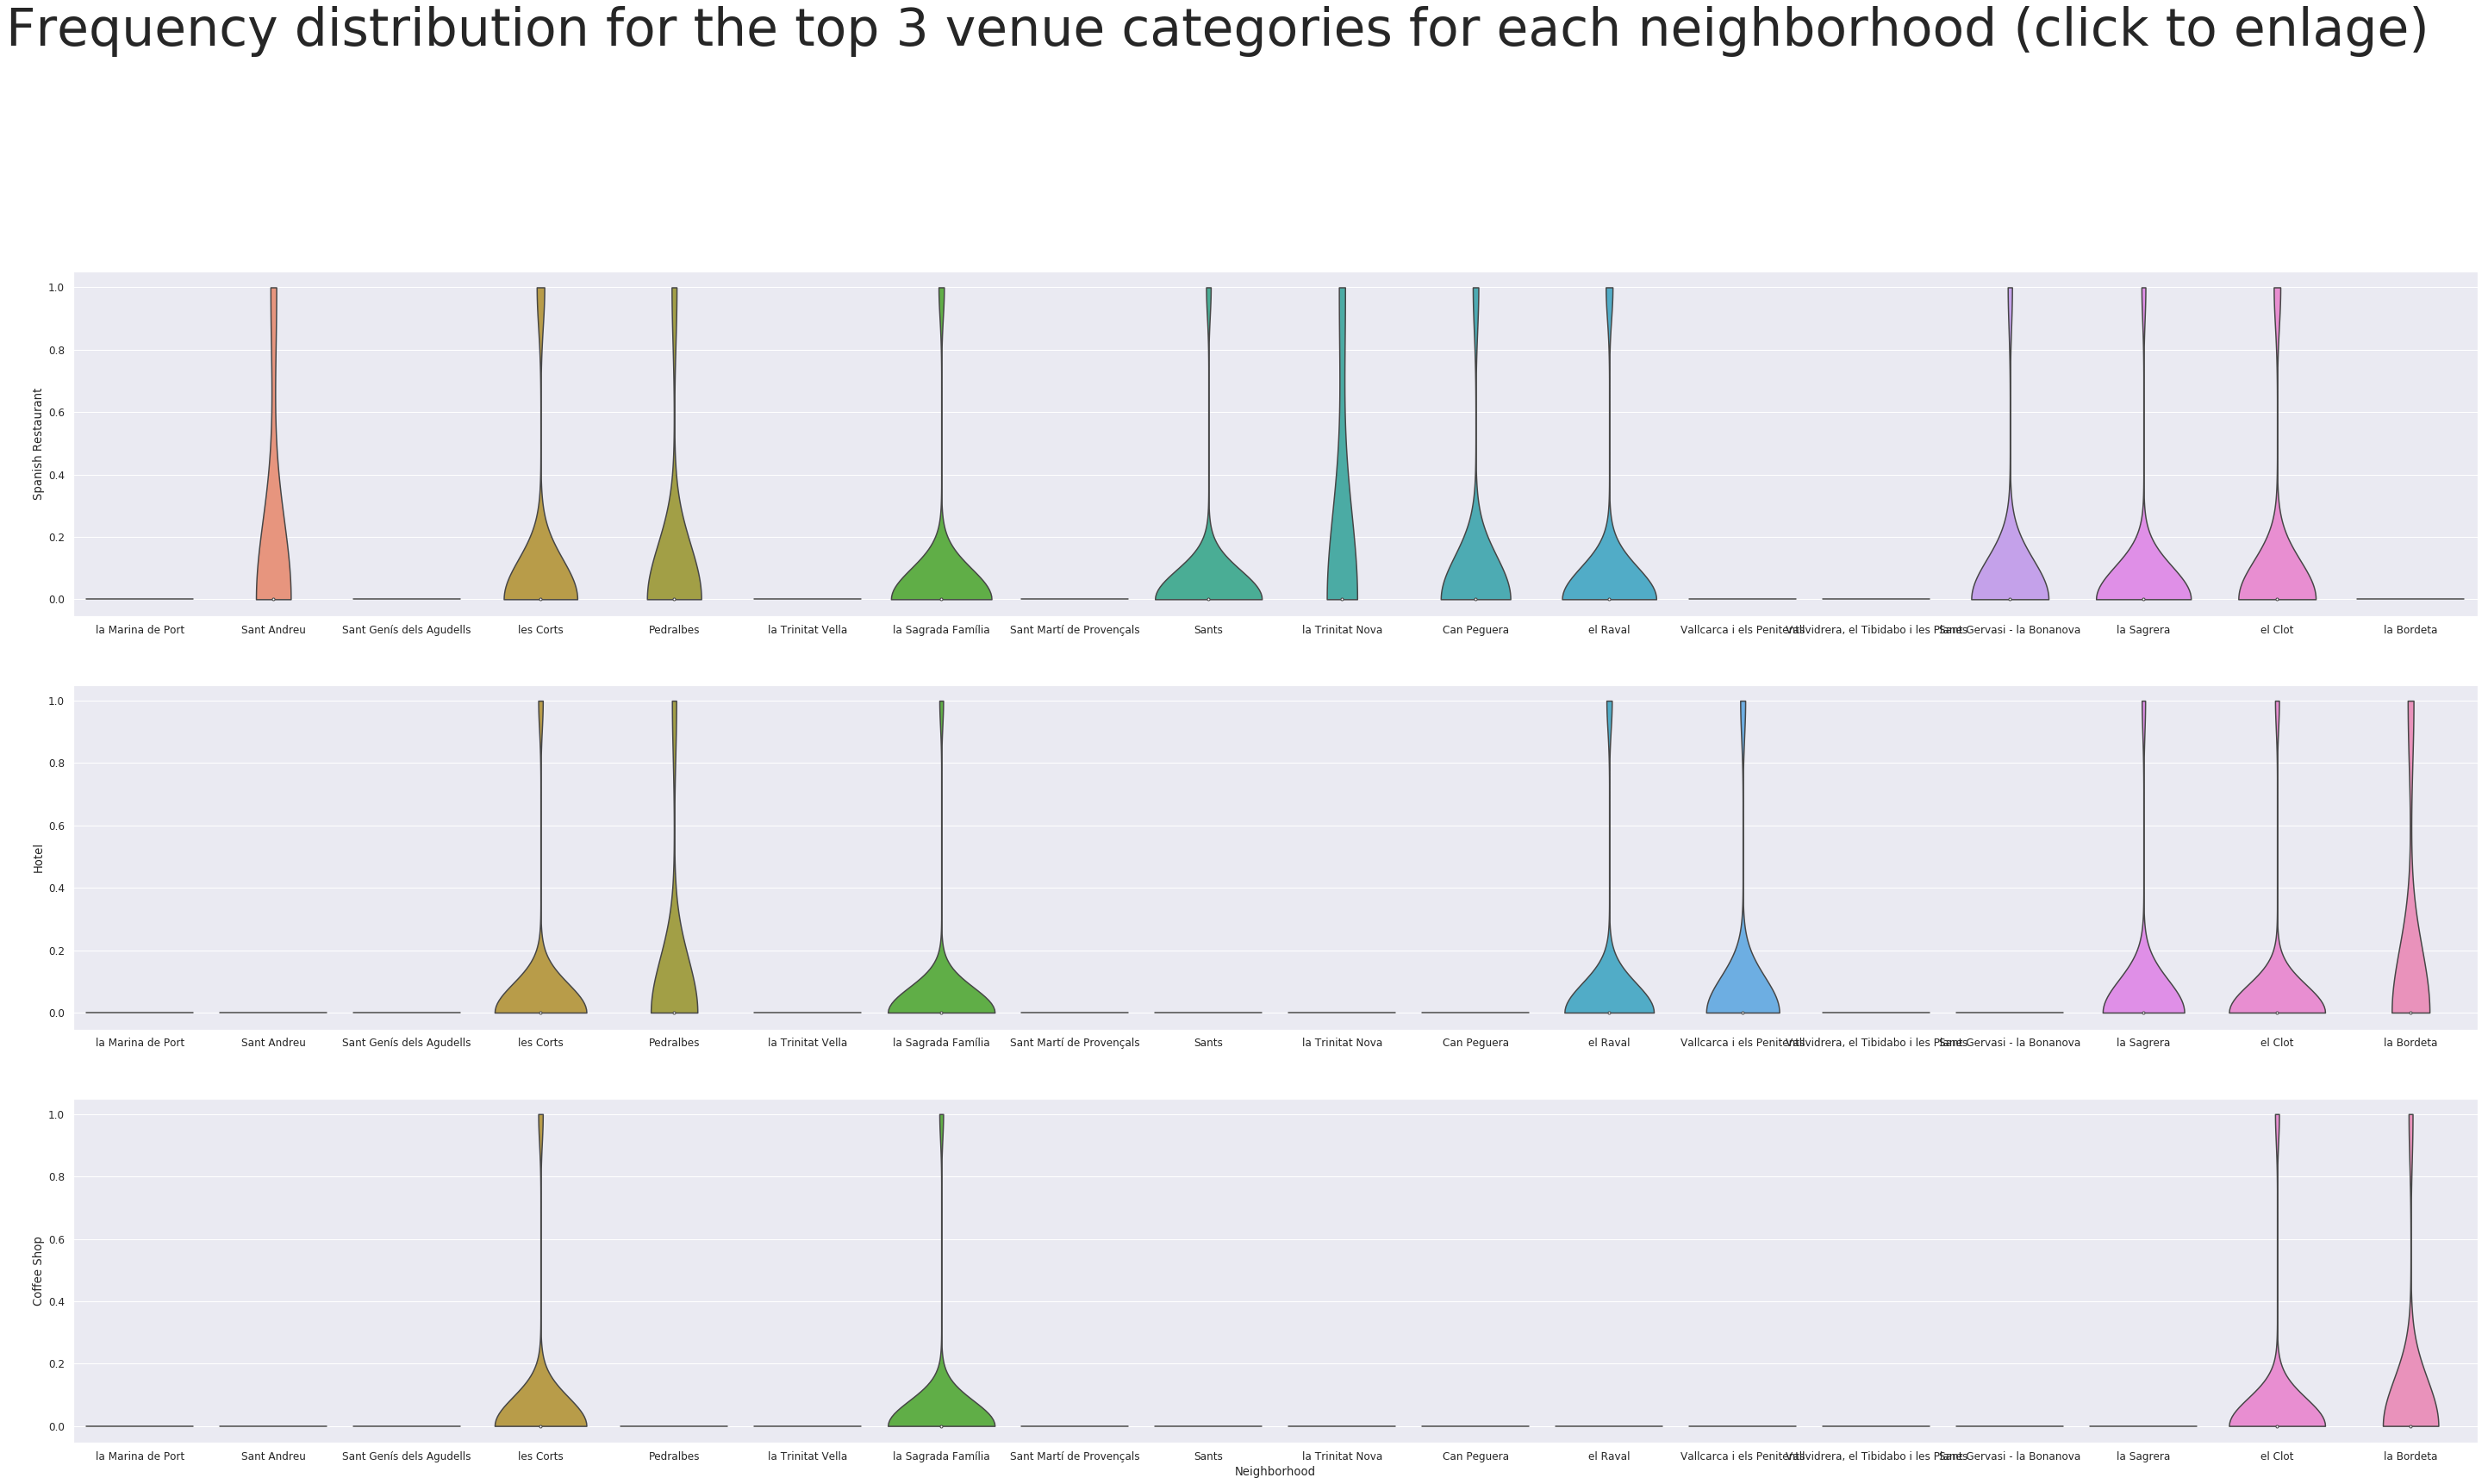

In [34]:
import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="Spanish Restaurant", data=barcelona_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Hotel", data=barcelona_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Coffee Shop", data=barcelona_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

## Conclusions

After analysing the results we can see that the neighborhoods of ‘La Sagrada Familia’, ‘Les Corts’ and ‘El Clot’ have a similar presence of ‘Spanish Restaurants’, ‘Hotels’ and ‘Coffee Shops’. To decide the neigborhood in which to install the local retail will depend on the cost of the square metre, which should we considered in a study after this one.